**Курсовой проект для курса "Python для Data Science"**

**Задание: Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).**

Целевая переменная: Price

Метрика качества: R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:

  1.R2 > 0.6
  2.Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
  3.Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).
   
Сроки сдачи: Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):

  1.Файл должен содержать заголовки и комментарии (markdown)
  2.Повторяющиеся операции лучше оформлять в виде функций
  3.Не делать вывод большого количества строк таблиц (5-10 достаточно)
  4.По возможности добавлять графики, описывающие данные (около 3-5)
  5.Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
  6.Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
  7.Весь проект должен быть в одном скрипте (файл ipynb).
  8.Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

***Подключение библиотек и скриптов***

In [313]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.metrics import r2_score

***Пути к директориям и файлам***

In [314]:
MODEL_DATASET_PATH = 'C:\\учеба\\numpy\\train.csv'
PREDICT_DATASET_PATH = 'C:\\учеба\\numpy\\test.csv'

**Описание датасета**
* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [315]:
df = pd.read_csv(MODEL_DATASET_PATH)
df_pred = pd.read_csv(PREDICT_DATASET_PATH)

***Изучение датасета***

In [316]:
print(df.shape)

(10000, 20)


In [317]:
print(df_pred.shape)

(5000, 19)


In [318]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [319]:
df_pred.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [321]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

***Обработка пропусков***

In [322]:
def df_notnull(any_df):
    any_df.loc[any_df['LifeSquare'].isnull(), 'LifeSquare'] = any_df['LifeSquare'].median()
    any_df.loc[any_df['Healthcare_1'].isnull(), 'Healthcare_1'] = any_df['Healthcare_1'].median()
    return any_df

In [323]:
df_notnull(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [324]:
df_notnull(df_pred)
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

***Обработка выбросов***

In [325]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


***Square***

Обшая площадь должна быть больше жилой площади

In [326]:
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True] 
# если разница меньше 5м, скорее всего, ошибка ввода либо обработки пропусков и можно ею пренебречь,
# или это может означать, что поменяли местами жилую и общую площадь

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
357,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,900.0,0,2,B,141780.231857
3530,5210,27,1.0,27.245731,32.781260,1.0,8,16.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,74982.605917
3730,13445,27,1.0,27.128762,32.781260,1.0,13,22.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,96865.319502
4051,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,211324.917957
5183,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
5712,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,900.0,0,1,B,104891.073757
6758,15923,27,1.0,26.553188,32.781260,0.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,114256.236153
7033,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
7762,8940,34,1.0,26.811587,32.781260,0.0,18,0.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,175399.643453
8000,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366


In [327]:
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True, 'LifeSquare'] = df['Square']
df.loc[5183, "LifeSquare"] = df.loc[5183, "Square"]
df.loc[7033, "Square"] = df.loc[7033, "LifeSquare"]
df.loc[8000, "LifeSquare"] = df.loc[8000, "Square"]
df.loc[8805, "Square"] = df.loc[8805, "LifeSquare"]
df.loc[9067, "Square"] = df.loc[9067, "LifeSquare"]

In [328]:
df.loc[df['Square'] < 7] # самые маленькие квартиры из датасета

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,900.0,3,2,B,438005.182323
328,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,161379.067034
1401,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4496,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,458378.777006
4800,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
5009,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B,107604.269441
7033,1748,88,2.0,5.497061,5.497061,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
7470,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,181434.825589
8572,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
8805,10527,27,1.0,4.380726,4.380726,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383


In [329]:
df.loc[df['Square'] < 7, 'Square'] = df['Square']*10

In [330]:
df_pred.loc[((df_pred['Square'] - df_pred['LifeSquare']) < -5) == True] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
571,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
1823,12833,27,1.0,27.658462,32.925087,0.0,10,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
2262,15846,34,1.0,26.719723,32.925087,1.0,4,2.0,2015,0.069753,B,B,53,13670,4,900.0,1,11,B
3798,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,900.0,0,0,B


In [331]:
df_pred.loc[571, "Square"] = df_pred.loc[571, "LifeSquare"]
df_pred.loc[3798, "LifeSquare"] = df_pred.loc[3798, "Square"]

***year***

In [332]:
df[(df['HouseYear'] <= 1000) | (df['HouseYear'] > 2030)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [333]:
# обработаем вручную
df.loc[8828, "HouseYear"] = 1968
df.loc[9163, "HouseYear"] = 2011

In [334]:
df_pred[(df_pred['HouseYear'] <= 1000) | (df_pred['HouseYear'] > 2030)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


***Анализ целевой переменной***

In [335]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

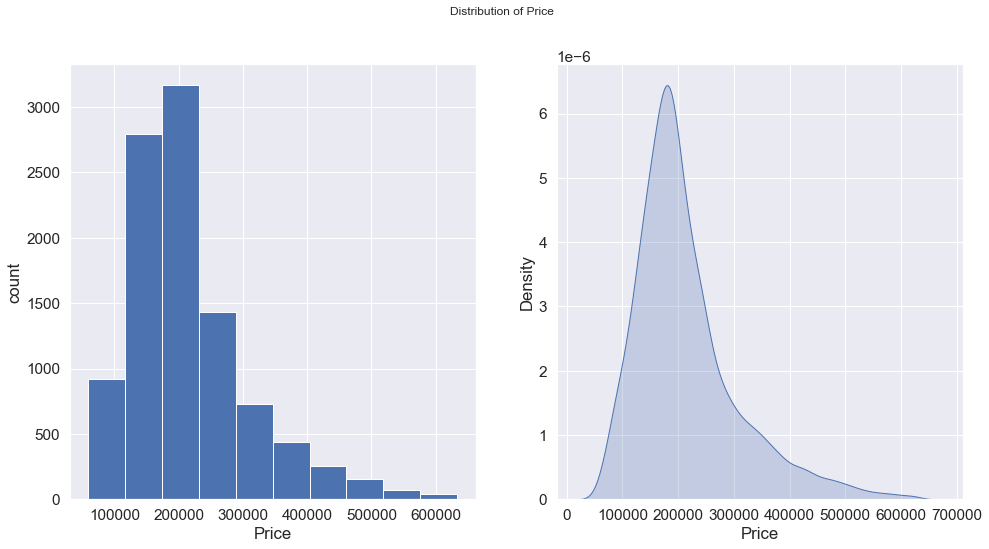

In [336]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show() # распределение получилось без явных выбросов

In [337]:
target_mean = round(df['Price'].mean(), 2)
target_median = round(df['Price'].median(), 2)
target_mode = round(df['Price'].mode()[0], 2)

target_mean, target_median, target_mode

(214138.86, 192269.64, 59174.78)

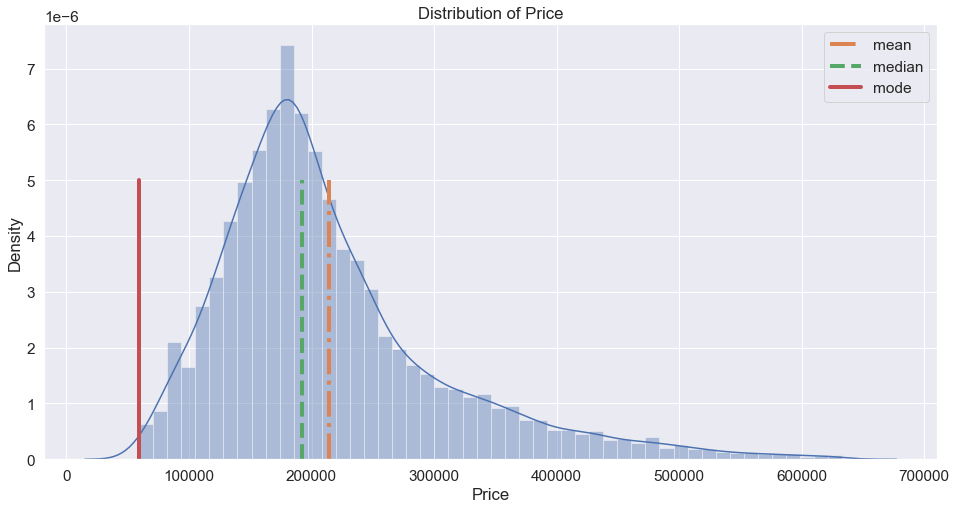

In [338]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean]*100 , y, label='mean', linestyle='-.', linewidth=4)
plt.plot([target_median]*100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode]*100, y, label='mode', linestyle='-', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show() # мода имеет минимальное значение

**Отбор и построение новых признаков**


***Преобразуем категориальные признаки в бинарные***

In [339]:
def df_binars(any_df):
    any_df = pd.concat([any_df, pd.get_dummies(any_df['Ecology_2'])], axis=1)
    any_df = any_df.rename(columns = {'A':'Ecology_2_A', 'B': 'Ecology_2_B'})
    any_df = pd.concat([any_df, pd.get_dummies(any_df['Ecology_3'])], axis=1)
    any_df = any_df.rename(columns = {'A':'Ecology_3_A', 'B': 'Ecology_3_B'})
    any_df = pd.concat([any_df, pd.get_dummies(any_df['Shops_2'])], axis=1)
    any_df = any_df.rename(columns = {'A':'Shops_2_A', 'B': 'Shops_2_B'})
    return any_df

In [340]:
df = df_binars(df)
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [341]:
df_pred = df_binars(df_pred)

df_pred.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Ecology_2_A', 'Ecology_2_B',
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

Распределение цены в зависимости от района. Обычно в любом городе существуют дешевые районы и дорогие, и от района зависит цена квадратного метра. Сгруппируем значения, отсортируем, введем переменную, которая будет возрастать вместе с ценой квадратного метра в районе, и построим график

In [342]:
price_sq_district = df.groupby(['DistrictId'], as_index=False).agg({'Square': 'sum', 'Price': 'sum'})
price_sq_district["Price_1sq"] = price_sq_district["Price"] / price_sq_district["Square"]
price_sq_district = price_sq_district.sort_values('Price_1sq')
price_sq_district['District_price_index'] = np.arange(0, 205)

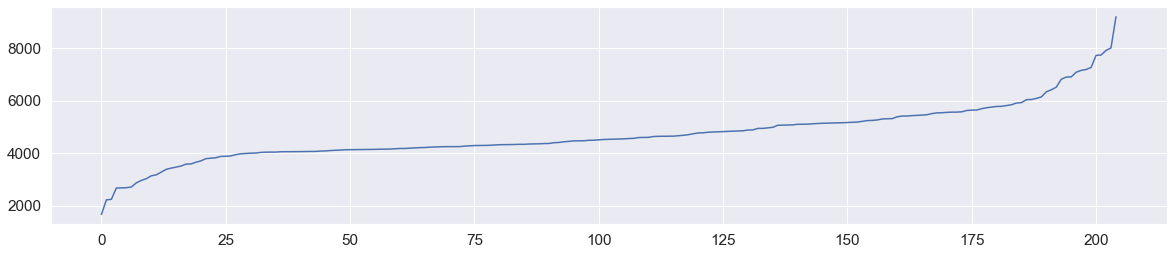

In [343]:
plt.figure(figsize=(20, 4))
x = price_sq_district['District_price_index']
y = price_sq_district['Price_1sq']
plt.plot(x, y)
plt.show()

In [344]:
price_sq_district.drop('Square', axis=1, inplace=True)
price_sq_district.drop('Price', axis=1, inplace=True)
price_sq_district.drop('Price_1sq', axis=1, inplace=True)

In [345]:
df = pd.merge(df, price_sq_district, on='DistrictId', how='left')
df_pred = pd.merge(df_pred, price_sq_district, on='DistrictId', how='left')

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    10000 non-null  int64  
 1   DistrictId            10000 non-null  int64  
 2   Rooms                 10000 non-null  float64
 3   Square                10000 non-null  float64
 4   LifeSquare            10000 non-null  float64
 5   KitchenSquare         10000 non-null  float64
 6   Floor                 10000 non-null  int64  
 7   HouseFloor            10000 non-null  float64
 8   HouseYear             10000 non-null  int64  
 9   Ecology_1             10000 non-null  float64
 10  Ecology_2             10000 non-null  object 
 11  Ecology_3             10000 non-null  object 
 12  Social_1              10000 non-null  int64  
 13  Social_2              10000 non-null  int64  
 14  Social_3              10000 non-null  int64  
 15  Healthcare_1        

In [347]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    5000 non-null   int64  
 1   DistrictId            5000 non-null   int64  
 2   Rooms                 5000 non-null   float64
 3   Square                5000 non-null   float64
 4   LifeSquare            5000 non-null   float64
 5   KitchenSquare         5000 non-null   float64
 6   Floor                 5000 non-null   int64  
 7   HouseFloor            5000 non-null   float64
 8   HouseYear             5000 non-null   int64  
 9   Ecology_1             5000 non-null   float64
 10  Ecology_2             5000 non-null   object 
 11  Ecology_3             5000 non-null   object 
 12  Social_1              5000 non-null   int64  
 13  Social_2              5000 non-null   int64  
 14  Social_3              5000 non-null   int64  
 15  Healthcare_1         

In [348]:
pd.set_option('display.max_columns', None)
df_pred[df_pred['District_price_index'].isnull()]  #районы, отсутствующие в наблюдение

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,District_price_index
1279,14939,210,2.0,54.953826,31.223917,6.0,3,10.0,1956,8.194346e-02,B,B,20,2738,20,900.0,1,4,B,0,1,0,1,0,1,NaN
1979,8845,203,2.0,50.417709,27.587971,7.0,5,4.0,1977,1.501689e-02,B,B,17,3079,59,2890.0,0,8,B,0,1,0,1,0,1,NaN
2280,9155,204,3.0,88.559337,62.854221,8.0,8,7.0,1918,3.731645e-02,B,B,32,6748,93,562.0,4,10,B,0,1,0,1,0,1,NaN
2609,14024,198,2.0,47.477281,31.069466,5.0,2,5.0,1970,6.076152e-03,B,B,30,5285,0,645.0,6,6,B,0,1,0,1,0,1,NaN
2674,15655,211,2.0,46.501558,32.276987,5.0,5,5.0,1965,1.800000e-09,B,B,16,3681,73,1815.0,2,5,B,0,1,0,1,0,1,NaN
3723,13382,206,2.0,46.047289,27.384090,6.0,5,7.0,1930,7.815280e-05,B,B,22,6398,141,1046.0,3,23,B,0,1,0,1,0,1,NaN
4807,15748,212,2.0,75.655182,36.877626,15.0,2,7.0,1929,0.000000e+00,B,B,8,1423,37,562.0,1,8,B,0,1,0,1,0,1,NaN
4836,16217,206,4.0,76.428426,50.344903,11.0,7,6.0,1912,4.203159e-02,B,B,37,6856,84,1940.0,2,5,B,0,1,0,1,0,1,NaN


In [349]:
#находим районы с такими же параметрами (по Social_2, остальные проверяем) и устанавливаем индекс самого частого района
def df_pred_fill(soc2_num):
    df_soc2 = df[df['Social_2'] == soc2_num] 
    return df_soc2['District_price_index'].value_counts()
df_pred_fill(1423)

204    2
1      1
Name: District_price_index, dtype: int64

In [350]:
df_pred.loc[4807, 'District_price_index'] = 204
df_pred_fill(3681)

168    4
137    3
170    1
196    1
188    1
Name: District_price_index, dtype: int64

In [351]:
df_pred.loc[2674, 'District_price_index'] = 168
df_pred_fill(2738)

164    7
195    5
194    3
203    2
174    2
Name: District_price_index, dtype: int64

In [352]:
df_pred.loc[1279, 'District_price_index'] = 164
df_pred_fill(6856)

198    17
130    15
139     7
99      3
1       1
Name: District_price_index, dtype: int64

In [353]:
df_pred.loc[4836, 'District_price_index'] = 198
df_pred_fill(6398)

5      228
148      5
202      5
189      4
99       2
191      1
Name: District_price_index, dtype: int64

In [354]:
df_pred.loc[3723, 'District_price_index'] = 5
df_pred_fill(6748)

96     8
182    5
175    4
158    2
82     2
196    1
149    1
179    1
193    1
Name: District_price_index, dtype: int64

In [355]:
df_pred.loc[2280, 'District_price_index'] = 96
df_pred_fill(3079)

161    12
106     5
202     3
149     2
176     2
200     1
Name: District_price_index, dtype: int64

In [356]:
df_pred.loc[1979, 'District_price_index'] = 161
df_pred_fill(5285)

45     38
95     37
17     17
109     5
42      2
Name: District_price_index, dtype: int64

In [357]:
df_pred.loc[2609, 'District_price_index'] = 45

In [358]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    5000 non-null   int64  
 1   DistrictId            5000 non-null   int64  
 2   Rooms                 5000 non-null   float64
 3   Square                5000 non-null   float64
 4   LifeSquare            5000 non-null   float64
 5   KitchenSquare         5000 non-null   float64
 6   Floor                 5000 non-null   int64  
 7   HouseFloor            5000 non-null   float64
 8   HouseYear             5000 non-null   int64  
 9   Ecology_1             5000 non-null   float64
 10  Ecology_2             5000 non-null   object 
 11  Ecology_3             5000 non-null   object 
 12  Social_1              5000 non-null   int64  
 13  Social_2              5000 non-null   int64  
 14  Social_3              5000 non-null   int64  
 15  Healthcare_1         

***Интерквартильный размах***

In [359]:
df.Square.describe()

count    10000.000000
mean        56.355745
std         20.995512
min         11.368588
25%         41.784623
50%         52.519197
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [360]:
IQ=df.Square.describe()['75%']-df.Square.describe()['25%']
low_border=df.Square.describe()['25%']-IQ*1.5
high_border=df.Square.describe()['75%']+IQ*1.5
print(IQ,low_border,high_border)

24.116002246248243 5.610619630036204 102.07462861502918


In [361]:
df[(df['Square']<low_border)|(df['Square']>high_border)]  
# Значений площади, выходящих за интерквартильный размах, достаточно много, но скорее всего, это не выбросы, 
# а мало больших квартир - подавляющее большинство имеет высокие цены. Оставим как есть

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,District_price_index
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.871089,0,1,0,1,0,1,6
32,3876,100,4.0,104.769022,79.316650,8.0,4,8.0,1960,0.200147,B,B,23,3975,8,770.0,2,0,B,600903.828562,0,1,0,1,0,1,144
116,5594,23,3.0,105.479256,32.781260,1.0,16,25.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,245260.231007,0,1,0,1,0,1,2
123,739,84,4.0,102.522270,74.513462,9.0,4,5.0,1961,0.149666,B,B,22,4789,2,4087.0,4,1,B,415574.115819,0,1,0,1,0,1,45
136,5284,27,4.0,119.914990,78.518874,13.0,8,12.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,221374.057293,0,1,0,1,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,1205,23,2.0,148.671938,100.201652,1.0,1,3.0,2013,0.014073,B,B,2,475,0,900.0,0,0,B,152464.848743,0,1,0,1,0,1,2
9851,12142,74,3.0,116.494390,115.110477,0.0,3,17.0,2018,0.309479,B,B,35,7715,4,990.0,0,6,B,404355.847831,0,1,0,1,0,1,12
9877,11391,62,3.0,122.181937,32.781260,1.0,3,3.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,259991.137225,0,1,0,1,1,0,4
9937,6149,53,4.0,109.905861,94.268671,20.0,12,24.0,2018,0.049637,B,B,34,7759,0,229.0,1,3,B,492943.252891,0,1,0,1,0,1,120


***Матрица кореляций***

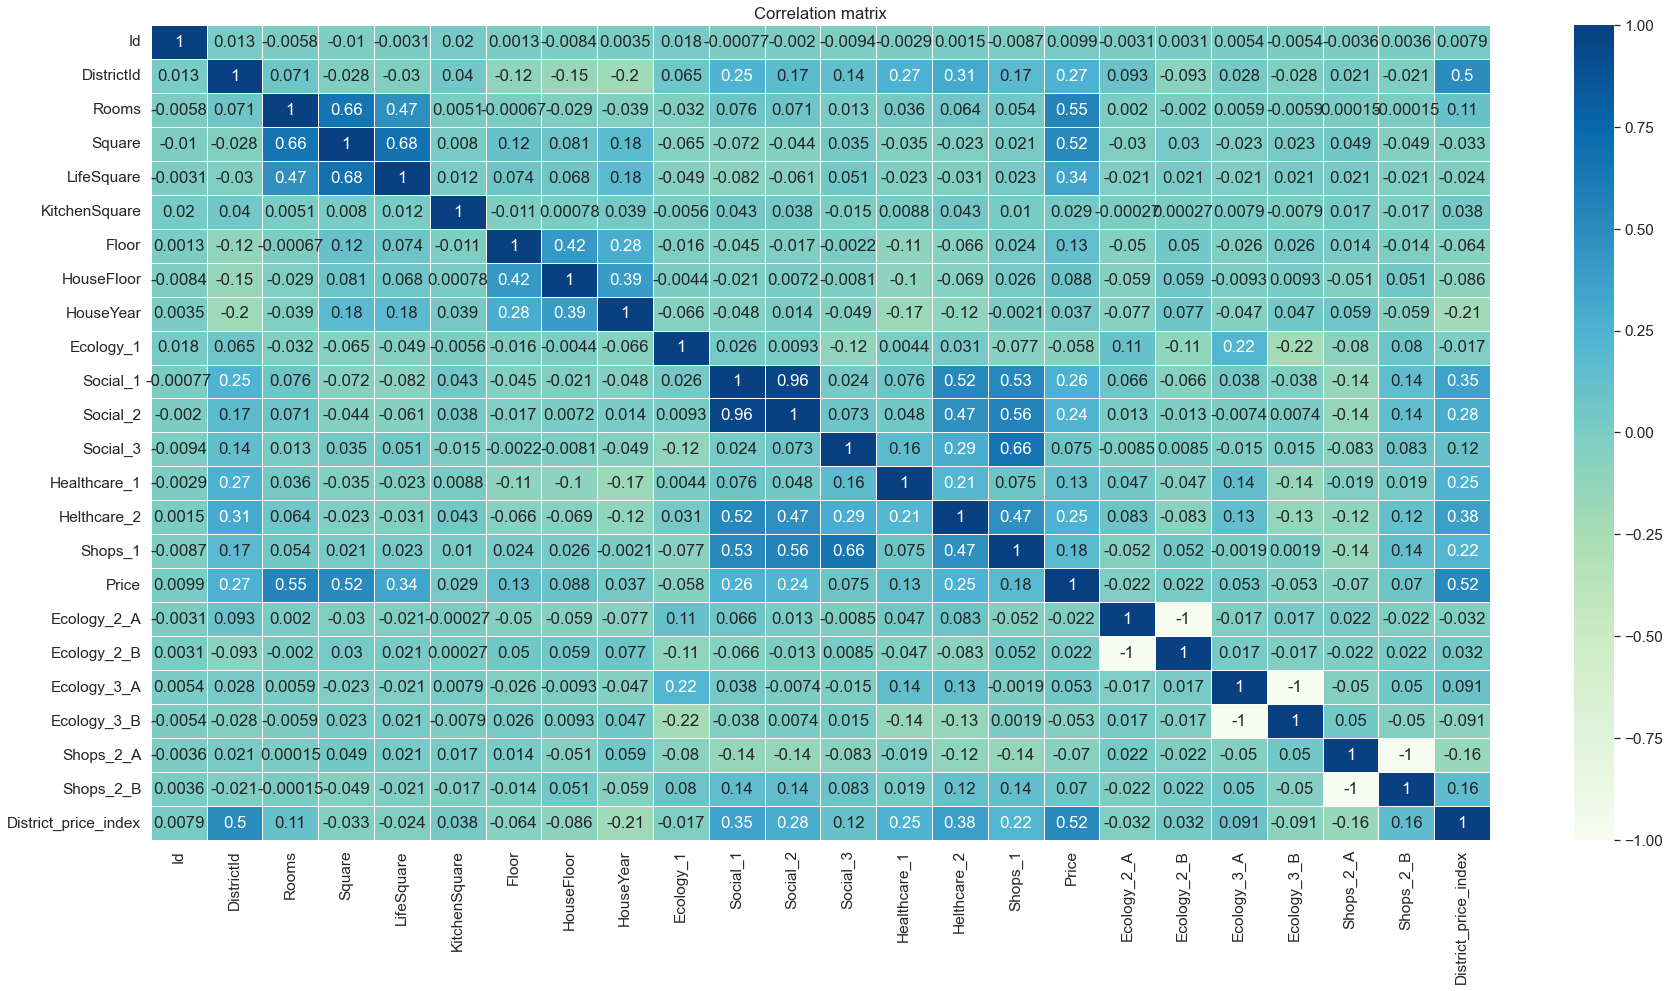

In [362]:
plt.figure(figsize = (30, 15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

***Подготовка к обучению***

In [363]:
y = df['Price']

In [364]:
def X_prepare(any_df): 
    X = any_df.copy()
    X['Id'] = X['Id'].astype(str)
    X.drop('Ecology_2', axis=1, inplace=True) # заменен бинарной переменной
    X.drop('Ecology_3', axis=1, inplace=True) # заменен бинарной переменной
    X.drop('Ecology_2_B', axis = 1, inplace = True) # колинеарен Ecology_2_A
    X.drop('Ecology_3_B', axis = 1, inplace = True) # колинеарен Ecology_3_A
    X.drop('Shops_2_B', axis = 1, inplace = True) # колинеарен Shops_2_A
    X.drop('Shops_2', axis=1, inplace=True) # заменен бинарной переменной
    X.drop('DistrictId', axis=1, inplace=True) # заменен показателем цены квадратного метра в районе
    X.drop('LifeSquare', axis = 1, inplace = True) # данные неполные и входят в общую площадь, показателем можно пренебречь 
    X.drop('KitchenSquare', axis = 1, inplace = True) # данные имеют нулевые и неправдоподобно малые значения и слабо влияют на целевую переменную
    X.drop('Healthcare_1', axis = 1, inplace = True) # данные неполные и слабо влияют на целевую переменную
    X['Floor'] = X['Floor'].astype('float64')
    X['HouseYear'] = X['HouseYear'].astype('float64')
    X['Social_1'] = X['Social_1'].astype('float64')
    X['Social_2'] = X['Social_2'].astype('float64')
    X['Social_3'] = X['Social_3'].astype('float64')
    X['Helthcare_2'] = X['Helthcare_2'].astype('float64')
    X['Shops_1'] = X['Shops_1'].astype('float64')
    X['Ecology_2_A'] = X['Ecology_2_A'].astype('float64')
    X['Ecology_3_A'] = X['Ecology_3_A'].astype('float64')
    X['Shops_2_A'] = X['Shops_2_A'].astype('float64')
    X['District_price_index'] = X['District_price_index'].astype('float64')
    return X

In [365]:
X = X_prepare(df)

In [366]:
X.drop('Price', axis = 1, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    10000 non-null  object 
 1   Rooms                 10000 non-null  float64
 2   Square                10000 non-null  float64
 3   Floor                 10000 non-null  float64
 4   HouseFloor            10000 non-null  float64
 5   HouseYear             10000 non-null  float64
 6   Ecology_1             10000 non-null  float64
 7   Social_1              10000 non-null  float64
 8   Social_2              10000 non-null  float64
 9   Social_3              10000 non-null  float64
 10  Helthcare_2           10000 non-null  float64
 11  Shops_1               10000 non-null  float64
 12  Ecology_2_A           10000 non-null  float64
 13  Ecology_3_A           10000 non-null  float64
 14  Shops_2_A             10000 non-null  float64
 15  District_price_index

In [367]:
X_pred = X_prepare(df_pred)

In [368]:
import warnings
warnings.filterwarnings('ignore')

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

***Построение базовых моделей и выбор лучшей***

**Линейная регрессия***

In [370]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [371]:
y_pred_lr = lr.predict(X_test)

In [372]:
r2_score(y_test, y_pred_lr)

0.6087197301610293

In [373]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [374]:
lr.fit(X_train_scaled, y_train)
y_pred_scaled = lr.predict(X_test_scaled)
r2_score(y_test, y_pred_scaled)

0.6100619217356471

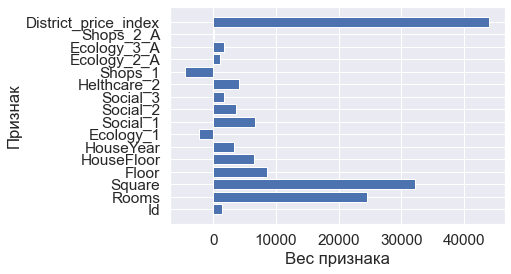

In [375]:
plt.barh(X_train.columns, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [376]:
important_features = [
    feature
    for feature, weight in zip(X_train.columns, lr.coef_.flatten())
    if np.abs(weight) > 4000
]

print(important_features)

['Rooms', 'Square', 'Floor', 'HouseFloor', 'Social_1', 'Helthcare_2', 'Shops_1', 'District_price_index']


In [377]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred_scaled_imp = lr.predict(X_test_scaled.loc[:, important_features])

r2_score(y_test, y_pred_scaled_imp) # показатель эффективности изменился незначительно,а при уменьшении количества признаков резко снижается

0.6075193586078134

***Случайный лес***

In [378]:
rfr = RandomForestRegressor(random_state=30)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
r2_score(y_test, y_pred_rfr)

0.7342608403723516

***GradientBoosting***

In [379]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
r2_score(y_test, y_pred_gbr)

0.7428754912977593

***Подбор гиперпараметров***

In [380]:
gb_model = GradientBoostingRegressor(random_state=25)
gb_model

GradientBoostingRegressor(random_state=25)

In [381]:
#%%time
params = {'n_estimators':[50, 100, 200], 
          'max_depth':[3, 5, 7]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=25, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=25, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=25), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [382]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [383]:
gs.best_score_

0.7471590722195142

***Предсказание***

In [384]:
X_pred['Price'] = gs.predict(X_pred)

In [385]:
X_pred['Id'] = X_pred['Id'].astype('int64')

In [386]:
X_pred.loc[:, ['Id', 'Price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Price   5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 246.2 KB


In [387]:
preds = X_pred.loc[:, ['Id', 'Price']]

In [388]:
preds.head(5)

,Id,Price
0,4567,168612.807555
1,5925,122877.413029
2,960,149934.517361
3,3848,114504.413360
4,746,181439.805852


In [389]:
preds.to_csv('MKayumova_predictions.csv', index=None)